In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
from pycaret.classification import *
import numpy as np

ds_raw = pd.read_csv("Vodafone_Customer_Churn_Sample_Dataset.csv")

In [2]:
ds_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
ProfileReport(ds_raw)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# int: tenure
# float: TotalCharges (add missing -10)
ds_clean = ds_raw.drop(columns=['customerID'])
# ds_clean["Churn"] = ds_clean["Churn"].map({"Yes":1, "No":0})
ds_clean["tenure"] = ds_clean["tenure"].astype(int)
ds_clean["TotalCharges"] = ds_clean["TotalCharges"].replace(' ', '-1')
ds_clean["TotalCharges"] = ds_clean["TotalCharges"].astype("float64")


In [9]:
# tenure np.null value

18.8

In [5]:
ds_clean.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int32
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
for column in ds_clean.columns:
    if ds_clean[column].dtype == 'object':
        print(column)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [7]:
for column in ds_clean.columns:
    if column == 'Churn':
        continue
    if ds_clean[column].dtype == 'object':
        print(column)
        ranked_column = ds_clean[ds_clean['Churn'] == "Yes"].groupby(column).size().sort_values(ascending=False)
        ranked_column_df = ranked_column.reset_index(name=column + "_count")
        ranked_column_df['Rank'] = ranked_column_df.index + 1
        column_rank_mapping = ranked_column_df.set_index(column)['Rank'].to_dict()
        ds_clean[column] = ds_clean[column].map(column_rank_mapping)

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


In [8]:
ds_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,2,1,1,2,3,2,1,2,1,1,1,1,1,1,1,29.85,29.85,No
1,2,0,1,1,34,1,2,2,2,1,2,1,1,1,2,2,2,56.95,1889.50,No
2,2,0,1,1,2,1,2,2,2,2,1,1,1,1,1,1,2,53.85,108.15,Yes
3,2,0,1,1,45,2,3,2,2,1,2,2,1,1,2,2,3,42.30,1840.75,No
4,1,0,1,1,2,1,2,1,1,1,1,1,1,1,1,1,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,0,2,2,24,1,1,2,2,1,2,2,2,2,2,1,2,84.80,1990.50,No
7039,1,0,2,2,72,1,1,1,1,2,2,1,2,2,2,1,4,103.20,7362.90,No
7040,1,0,2,2,11,2,3,2,2,1,1,1,1,1,1,1,1,29.60,346.45,No
7041,2,1,2,1,4,1,1,1,1,1,1,1,1,1,1,1,2,74.40,306.60,Yes


In [9]:
clf1 = setup(data = ds_clean, target = 'Churn', session_id=3)

# compare models
best = compare_models()

,Description,Value
0,Session id,3
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 20)"
5,Transformed data shape,"(7043, 20)"
6,Transformed train set shape,"(4930, 20)"
7,Transformed test set shape,"(2113, 20)"
8,Numeric features,19
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8039,0.8485,0.8039,0.7950,0.7964,0.4632,0.4686,0.5470
ridge,Ridge Classifier,0.8030,0.8379,0.8030,0.7926,0.7933,0.4517,0.4598,0.0200
lr,Logistic Regression,0.8022,0.8436,0.8022,0.7941,0.7958,0.4632,0.4675,0.7720
lda,Linear Discriminant Analysis,0.8004,0.8379,0.8004,0.7927,0.7946,0.4610,0.4646,0.0480
ada,Ada Boost Classifier,0.7990,0.8454,0.7990,0.7901,0.7921,0.4528,0.4572,0.1010
lightgbm,Light Gradient Boosting Machine,0.7947,0.8354,0.7947,0.7856,0.7879,0.4418,0.4459,0.3700
rf,Random Forest Classifier,0.7929,0.8295,0.7929,0.7825,0.7837,0.4278,0.4349,0.2140
xgboost,Extreme Gradient Boosting,0.7846,0.8264,0.7846,0.7765,0.7789,0.4208,0.4238,0.1760
et,Extra Trees Classifier,0.7803,0.8050,0.7803,0.7694,0.7719,0.3986,0.4036,0.3960
svm,SVM - Linear Kernel,0.7753,0.7617,0.7753,0.7639,0.7619,0.3701,0.3819,0.0280


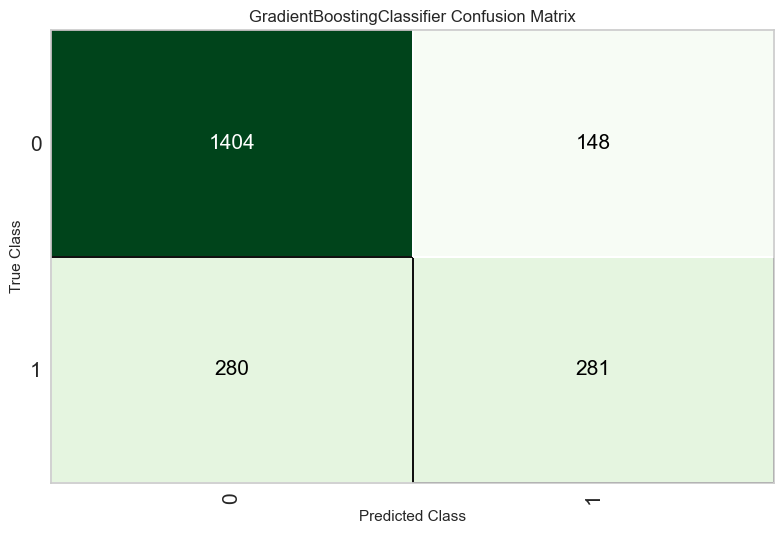

In [10]:
plot_model(best, plot = 'confusion_matrix')

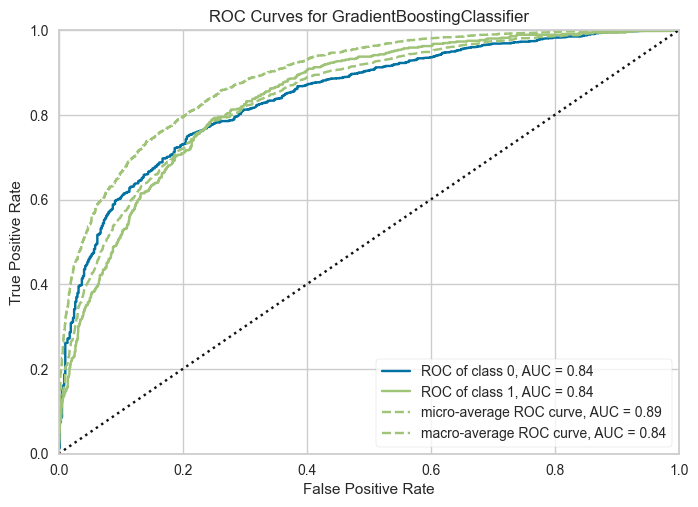

In [11]:
# plot AUC
plot_model(best, plot = 'auc')

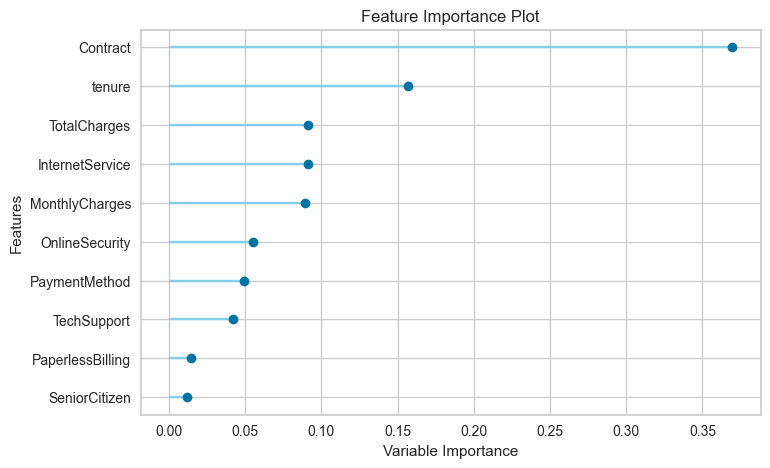

In [12]:
plot_model(best, plot='feature')

In [18]:
ada = create_model('ada')
gbc = create_model('gbc')
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8134,0.8562,0.8134,0.8078,0.8098,0.5022,0.5037
1,0.8276,0.8668,0.8276,0.8196,0.8181,0.5140,0.5246
2,0.8256,0.8721,0.8256,0.8181,0.8190,0.5227,0.5283
3,0.8053,0.8393,0.8053,0.7988,0.8010,0.4808,0.4826
4,0.7931,0.8328,0.7931,0.7846,0.7873,0.4427,0.4453
5,0.8154,0.8583,0.8154,0.8066,0.8075,0.4910,0.4976
6,0.7890,0.8482,0.7890,0.7789,0.7818,0.4258,0.4296
7,0.7627,0.8025,0.7627,0.7483,0.7525,0.3456,0.3503
8,0.7951,0.8565,0.7951,0.7858,0.7884,0.4438,0.4474


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8073,0.8373,0.8073,0.8042,0.8056,0.4950,0.4954
1,0.8012,0.8408,0.8012,0.7904,0.7922,0.4471,0.4537
2,0.7850,0.8330,0.7850,0.7739,0.7769,0.4118,0.4161
3,0.7748,0.8111,0.7748,0.7702,0.7722,0.4101,0.4106
4,0.7688,0.8125,0.7688,0.7634,0.7657,0.3926,0.3932
5,0.7830,0.8380,0.7830,0.7734,0.7766,0.4138,0.4166
6,0.7830,0.8312,0.7830,0.7727,0.7759,0.4108,0.4141
7,0.7485,0.7761,0.7485,0.7437,0.7459,0.3426,0.3429
8,0.7951,0.8479,0.7951,0.7841,0.7863,0.4351,0.4409


In [19]:
ada_tuned = tune_model(ada)
gbc_tuned = tune_model(gbc)
xgboost_tuned = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8134,0.8517,0.8134,0.8033,0.8021,0.4697,0.4814
1,0.8134,0.8580,0.8134,0.8074,0.7925,0.4359,0.4687
2,0.8073,0.8606,0.8073,0.7964,0.7938,0.4484,0.4631
3,0.7931,0.8372,0.7931,0.7822,0.7846,0.4310,0.4364
4,0.7931,0.8183,0.7931,0.7822,0.7846,0.4310,0.4364
5,0.8053,0.8534,0.8053,0.7943,0.7944,0.4530,0.4629
6,0.7911,0.8479,0.7911,0.7776,0.7781,0.4084,0.4191
7,0.7566,0.8003,0.7566,0.7343,0.7369,0.2937,0.3061
8,0.8134,0.8651,0.8134,0.8036,0.8029,0.4758,0.4862


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8093,0.8607,0.8093,0.8023,0.8045,0.4862,0.4885
1,0.8357,0.8676,0.8357,0.8289,0.8267,0.5369,0.5480
2,0.8154,0.8672,0.8154,0.8066,0.8075,0.4910,0.4976
3,0.8032,0.8416,0.8032,0.7963,0.7987,0.4740,0.4760
4,0.7830,0.8234,0.7830,0.7727,0.7759,0.4108,0.4141
5,0.8032,0.8585,0.8032,0.7935,0.7955,0.4603,0.4656
6,0.8073,0.8522,0.8073,0.7980,0.7997,0.4714,0.4768
7,0.7606,0.8012,0.7606,0.7482,0.7524,0.3486,0.3517
8,0.7972,0.8620,0.7972,0.7883,0.7909,0.4508,0.4541


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7931,0.8628,0.7931,0.8176,0.8006,0.5129,0.5216
1,0.7992,0.8621,0.7992,0.8139,0.8044,0.5129,0.5169
2,0.7769,0.8600,0.7769,0.8021,0.7848,0.4767,0.4846
3,0.7769,0.8258,0.7769,0.8069,0.7857,0.4836,0.4942
4,0.7667,0.8264,0.7667,0.7933,0.7752,0.4541,0.4621
5,0.7850,0.8553,0.7850,0.8023,0.7910,0.4842,0.4887
6,0.7748,0.8430,0.7748,0.7994,0.7827,0.4707,0.4782
7,0.7059,0.7881,0.7059,0.7374,0.7170,0.3147,0.3208
8,0.8114,0.8614,0.8114,0.8295,0.8171,0.5505,0.5568


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [22]:
predict_model(gbc_tuned)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
4861,1,1,2,1,48,1,2,2,1,2,...,1,2,2,1,3,58.950001,2789.699951,No,No,0.9317
770,2,0,1,1,11,1,2,3,3,3,...,3,3,1,1,4,20.450001,237.300003,No,No,0.9043
1400,2,0,1,2,3,1,2,3,3,3,...,3,3,1,2,2,19.950001,58.299999,No,No,0.8946
5124,1,0,2,2,25,1,2,3,3,3,...,3,3,3,2,2,20.100000,486.049988,No,No,0.9834
5699,2,0,1,1,15,1,2,1,1,1,...,2,1,1,2,1,85.300003,1219.849976,No,Yes,0.5690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6010,2,0,2,2,24,1,1,3,3,3,...,3,3,3,2,2,24.200001,609.049988,No,No,0.9825
354,1,1,1,1,21,2,3,2,2,1,...,2,1,1,1,1,41.900002,840.099976,Yes,No,0.5761
6706,1,0,1,1,1,1,2,3,3,3,...,3,3,1,2,2,19.900000,19.900000,No,No,0.6980
3042,2,0,1,1,46,2,3,2,1,2,...,1,1,1,2,3,30.299999,1380.099976,Yes,No,0.8370


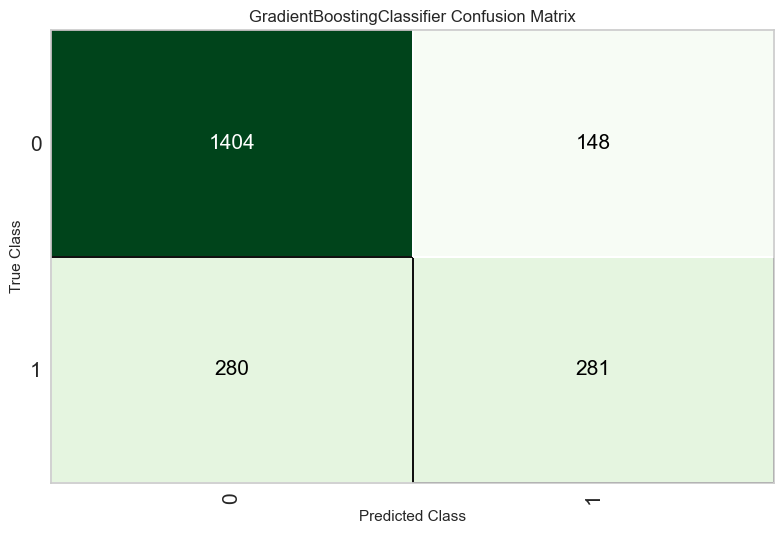

In [24]:
plot_model(gbc_tuned, plot = 'confusion_matrix')

In [29]:
dummy_stratified = create_model('dummy', strategy='stratified')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6329,0.5137,0.6329,0.6226,0.6275,0.0281,0.0282
1,0.6288,0.5085,0.6288,0.6185,0.6234,0.0174,0.0174
2,0.6146,0.4916,0.6146,0.6030,0.6085,-0.0174,-0.0174
3,0.6187,0.4968,0.6187,0.6072,0.6126,-0.0066,-0.0067
4,0.6065,0.4812,0.6065,0.5946,0.6003,-0.0388,-0.0389
5,0.6065,0.4812,0.6065,0.5946,0.6003,-0.0388,-0.0389
6,0.6268,0.5072,0.6268,0.6156,0.6209,0.0148,0.0148
7,0.6146,0.4916,0.6146,0.6030,0.6085,-0.0174,-0.0174
8,0.5984,0.4708,0.5984,0.5862,0.5920,-0.0602,-0.0603


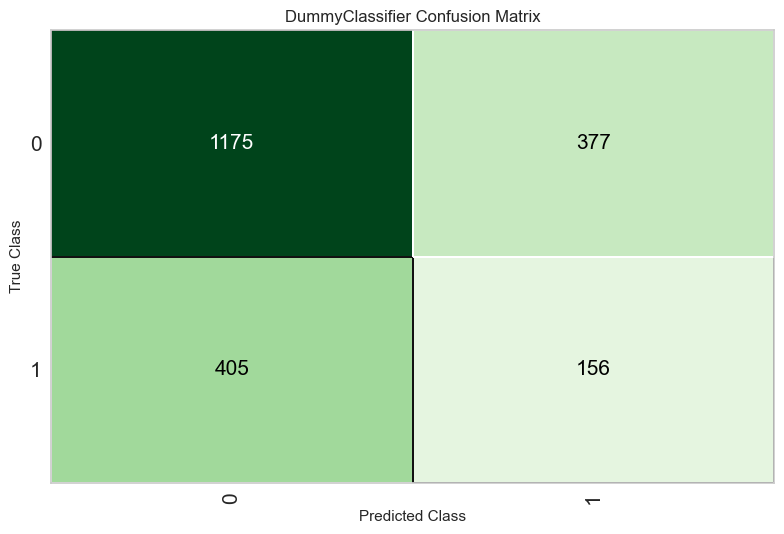

In [30]:
plot_model(dummy_stratified, plot = 'confusion_matrix')

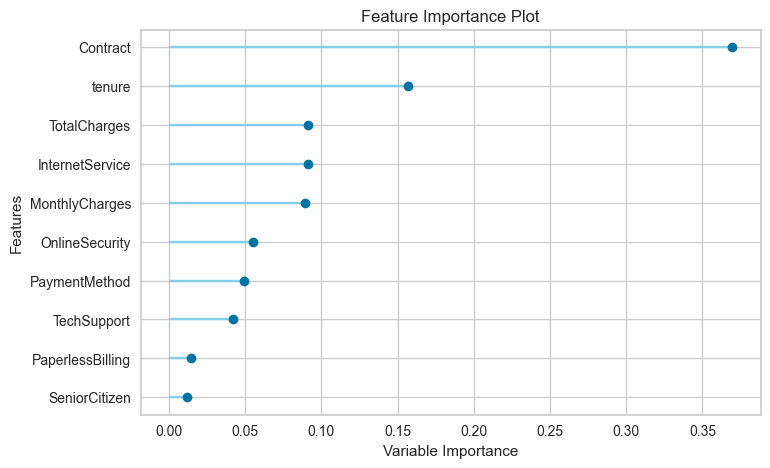

In [25]:
plot_model(gbc_tuned, plot='feature')

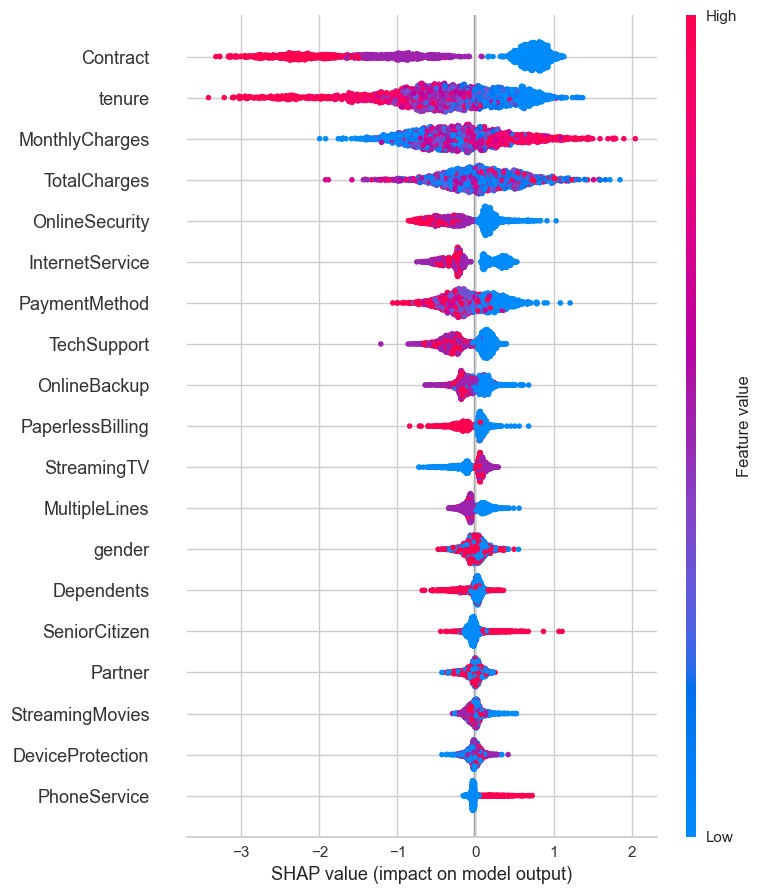

In [26]:
interpret_model(xgboost_tuned, plot = 'summary')

In [31]:
calibrated_gbc_tuned = calibrate_model(gbc_tuned)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8093,0.8596,0.8093,0.8029,0.8051,0.4888,0.4907
1,0.8276,0.8700,0.8276,0.8198,0.8168,0.5087,0.5221
2,0.8256,0.8693,0.8256,0.8181,0.8190,0.5227,0.5283
3,0.8093,0.8366,0.8093,0.8030,0.8052,0.4916,0.4934
4,0.7951,0.8312,0.7951,0.7858,0.7884,0.4438,0.4474
5,0.8114,0.8604,0.8114,0.8024,0.8039,0.4826,0.4881
6,0.7992,0.8498,0.7992,0.7886,0.7906,0.4463,0.4523
7,0.7667,0.8008,0.7667,0.7528,0.7567,0.3568,0.3616
8,0.7931,0.8576,0.7931,0.7827,0.7853,0.4340,0.4385


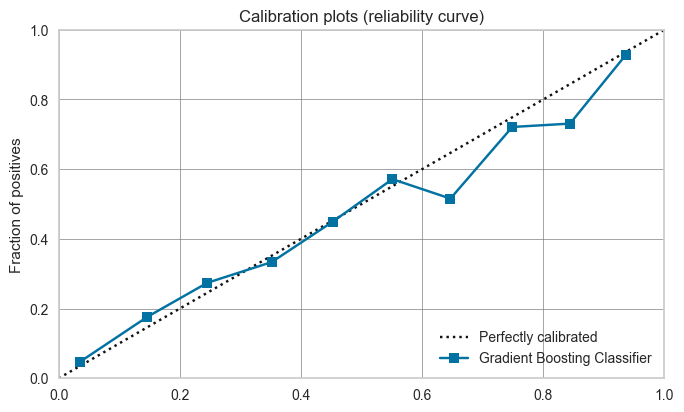

In [32]:
plot_model(calibrated_gbc_tuned, plot = 'calibration')